<font color="green" size=4>【キノカレッジ｜ファイナンス分析クラス｜23年1月】株価のデータを可視化してみよう（01）</font>

<font color="purple" size=3>　■ 問2　株価データ、会社情報を取得しよう</font>

In [7]:
#モジュールのインストール
!pip3 install --upgrade pip
!pip3 install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3
    Uninstalling pip-22.3:
      Successfully uninstalled pip-22.3
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable
  Using cached yfinance-0.2.9-py2.py3-none-any.whl (55 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.4
    Uninstalling pytz-2022.4:
      Successfully uninstalled pytz-2022.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-wa

In [8]:
#4
import yfinance as yf
#5
data = yf.download(tickers="^N225", start="2022-01-15", end="2023-01-14")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-17 00:00:00+09:00,28332.720703,28449.990234,28274.179688,28333.519531,28333.519531,54500000
2022-01-18 00:00:00+09:00,28451.339844,28690.339844,28129.660156,28257.250000,28257.250000,71300000
2022-01-19 00:00:00+09:00,27928.890625,27958.169922,27314.410156,27467.230469,27467.230469,84300000
2022-01-20 00:00:00+09:00,27401.429688,27882.529297,27217.589844,27772.929688,27772.929688,74000000
2022-01-21 00:00:00+09:00,27404.359375,27586.419922,27129.609375,27522.259766,27522.259766,72700000


In [2]:
#6
import pandas as pd
df = pd.read_csv('stock_codes.csv', index_col=0)
df

,銘柄名
コード,
1301,極洋
1305,ダイワ上場投信－トピックス
1306,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信
1308,上場インデックスファンドＴＯＰＩＸ
1309,ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信
...,...
9993,ヤマザワ
9994,やまや
9995,グローセル


In [9]:
# 1ポイントアドバイス：銘柄を検索
search = 'サッポロ'
df[df['銘柄名'].str.contains(search)]

,銘柄名
コード,
2501,サッポロホールディングス


In [10]:
# 証券コードを指定する
# 日本株の場合は、証券コードの最後に'.T'を付ける
# 2501の場合は、サッポロホールディングスとなる
stock_code = '2501.T'

# 引数をリテラルで書くことはなるべく避けるほうがコードにとって良いので変数に格納する
start = "2022-01-15"
end = "2023-01-14"

data = yf.download(tickers=stock_code, start=start, end=end)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-17 00:00:00+09:00,2208.0,2241.0,2203.0,2208.0,2180.844482,171100
2022-01-18 00:00:00+09:00,2220.0,2232.0,2203.0,2206.0,2178.869141,159700
2022-01-19 00:00:00+09:00,2199.0,2208.0,2153.0,2162.0,2135.410156,295100
2022-01-20 00:00:00+09:00,2152.0,2208.0,2152.0,2192.0,2165.041260,188800
2022-01-21 00:00:00+09:00,2166.0,2238.0,2162.0,2236.0,2208.500000,180700


In [17]:
!python3 -V
!pip3 --version
!pip3 show yfinance

Python 3.9.6
pip 22.3.1 from /Users/tera/Library/Python/3.9/lib/python/site-packages/pip (python 3.9)
Name: yfinance
Version: 0.2.9
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: /Users/tera/Library/Python/3.9/lib/python/site-packages
Requires: appdirs, beautifulsoup4, cryptography, frozendict, html5lib, lxml, multitasking, numpy, pandas, pytz, requests
Required-by: 


In [19]:
# 7
# 個別銘柄の情報を取得する方法
stock_code = '2501.T'
# 特定の証券コードの情報を取得
sapporo = yf.Ticker(stock_code)

# 2023年1月時点で取得できる
# その他情報
sapporo.info
# バランスシート
sapporo.balancesheet
# キャッシュフロー
sapporo.cashflow
# 財務状況
# sapporo.financials
# 収益
# sapporo.earnings
# 機関投資家
# sapporo.institutional_holders
# # 配当、株式分割、キャピタルゲイン（一気に確認）
# sapporo.actions
# # 配当
# sapporo.dividends
# # 株式分割
# sapporo.splits
# # キャピタルゲイン
# sapporo.capital_gains
# # 発行済み株式数
# sapporo.get_shares_full()
# # 主要株主
sapporo.major_holders

,0,1
0,14.05%,% of Shares Held by All Insider
1,40.91%,% of Shares Held by Institutions
2,47.60%,% of Float Held by Institutions
3,104,Number of Institutions Holding Shares


<font color="purple" size=3>　 ■ 問3　線グラフを作成しましょう</font>

In [20]:
# 引数をリテラルで書くことはなるべく避けるほうがコードにとって良いので変数に格納する
# 証券コードを指定する（日経平均：'^N225'）
stock_code = '^N225'
start = "2022-01-15"
end = "2023-01-14"

data = yf.download(tickers=stock_code, start=start, end=end)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-17 00:00:00+09:00,28332.720703,28449.990234,28274.179688,28333.519531,28333.519531,54500000
2022-01-18 00:00:00+09:00,28451.339844,28690.339844,28129.660156,28257.250000,28257.250000,71300000
2022-01-19 00:00:00+09:00,27928.890625,27958.169922,27314.410156,27467.230469,27467.230469,84300000
2022-01-20 00:00:00+09:00,27401.429688,27882.529297,27217.589844,27772.929688,27772.929688,74000000
2022-01-21 00:00:00+09:00,27404.359375,27586.419922,27129.609375,27522.259766,27522.259766,72700000


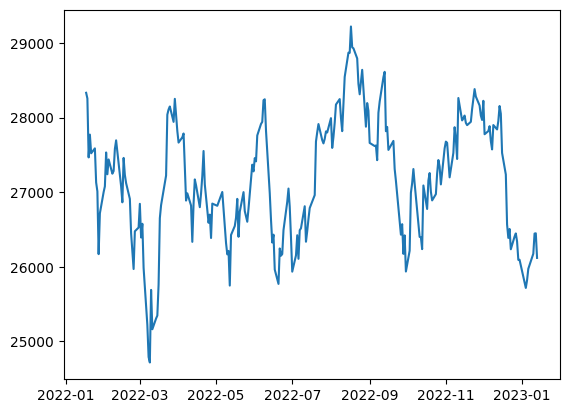

In [21]:
import matplotlib.pyplot as plt

# 1
# x軸：日付 y軸：Adj Close
x = data.index
y = data['Adj Close']
# 折線グラフ:pltメソッドの(plot関数)
plt.plot(x, y)
# グラフ表示:show関数
plt.show()

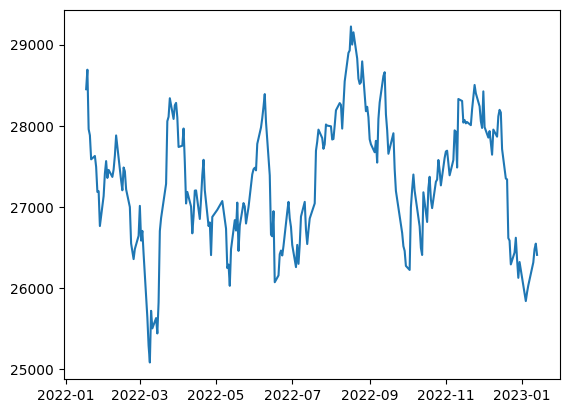

In [22]:
# 2
# x軸：日付 y軸：High
x = data.index
y = data['High']

plt.plot(x, y)
plt.show()

In [23]:
# 3
# 前日との差分:diffメソッド
data['Diff'] = data["Adj Close"].diff()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Diff
Date,,,,,,,
2022-01-17 00:00:00+09:00,28332.720703,28449.990234,28274.179688,28333.519531,28333.519531,54500000,NaN
2022-01-18 00:00:00+09:00,28451.339844,28690.339844,28129.660156,28257.250000,28257.250000,71300000,-76.269531
2022-01-19 00:00:00+09:00,27928.890625,27958.169922,27314.410156,27467.230469,27467.230469,84300000,-790.019531
2022-01-20 00:00:00+09:00,27401.429688,27882.529297,27217.589844,27772.929688,27772.929688,74000000,305.699219
2022-01-21 00:00:00+09:00,27404.359375,27586.419922,27129.609375,27522.259766,27522.259766,72700000,-250.669922


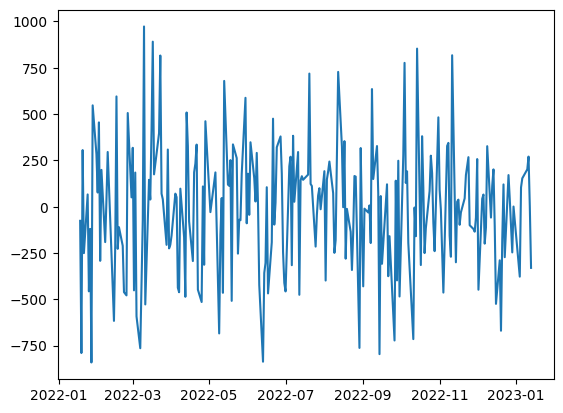

In [24]:
# x軸：日付 y軸：Diff
x = data.index
y = data['Diff']

plt.plot(x, y)
plt.show()

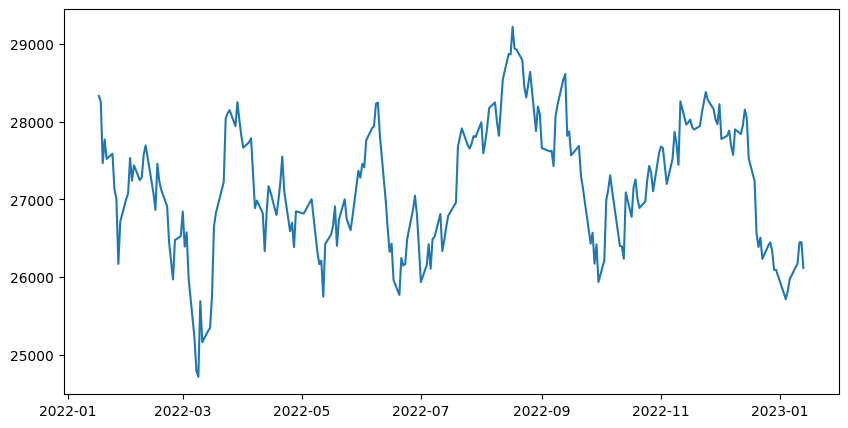

In [25]:
# 4
x = data.index
y = data['Adj Close']

# グラフ全体の変更：figure関数、サイズ変更：引数（figsize（横インチ、　縦インチ））
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.show()

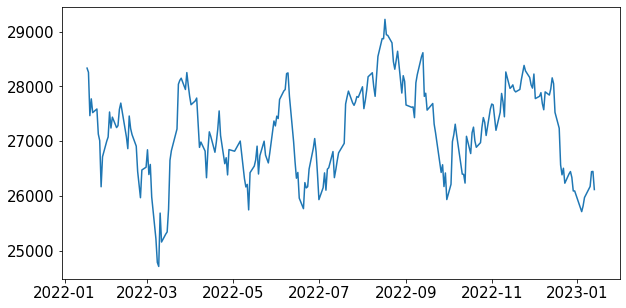

In [112]:
# 5
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5))
plt.plot(x, y)
# 各軸目盛りの変更：関数(xticks、yticks)、フォントサイズ変更：引数（fontsize)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

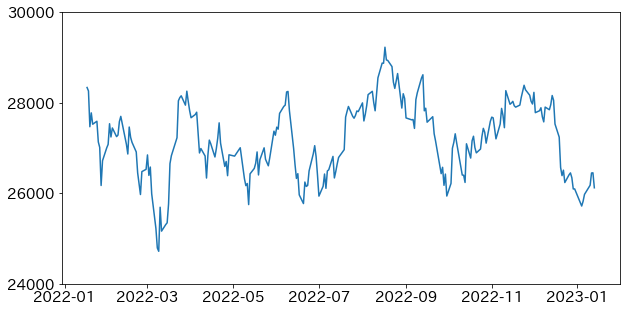

In [276]:
# 6
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5))
plt.plot(x, y)
# 各軸目盛りの変更：関数(xticks、yticks)、軸の目盛り変更：引数（ticks）、フォントサイズ変更：引数（fontsize)
plt.xticks(fontsize=15)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)

plt.show()

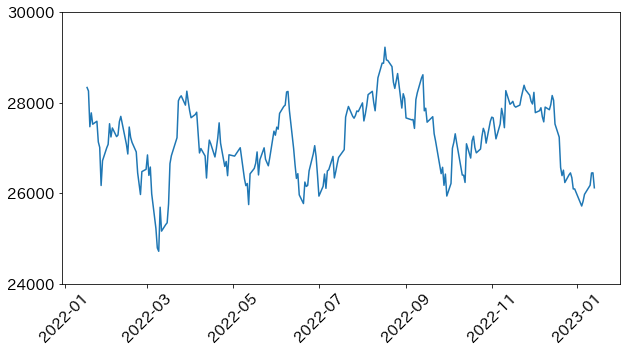

In [280]:
# 7
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5))
plt.plot(x, y)
# 各軸目盛り：関数(xticks、yticks)、軸目盛り：引数（ticks）、フォントサイズ：引数（fontsize)、軸の目盛り角度：引数（rotation）
plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)

plt.show()

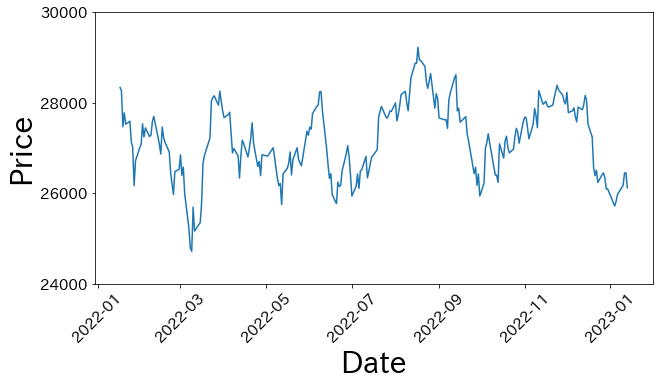

In [282]:
# 8
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
# x軸ラベル表示:関数(xlabel)、ラベル名:引数(xlabel)、フォントサイズ:引数(fontsize)
plt.xlabel('Date', fontsize=30)
# y軸ラベル表示:関数(ylabel)、ラベル名:引数(ylabel)、フォントサイズ:引数(fontsize)
plt.ylabel('Price', fontsize=30)

plt.show()

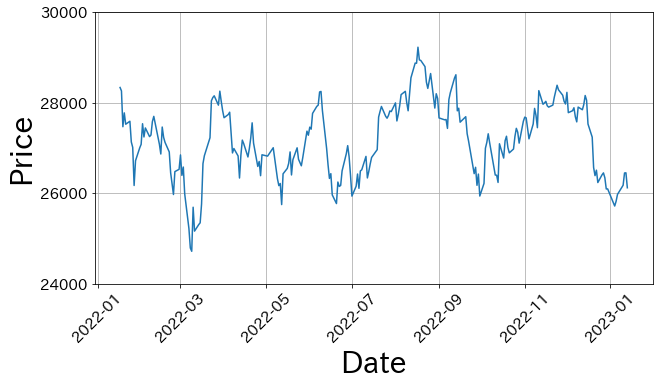

In [284]:
# 9
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5))
plt.plot(x, y)

plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
# グリッド線の表示：grid関数
plt.grid()

plt.show()

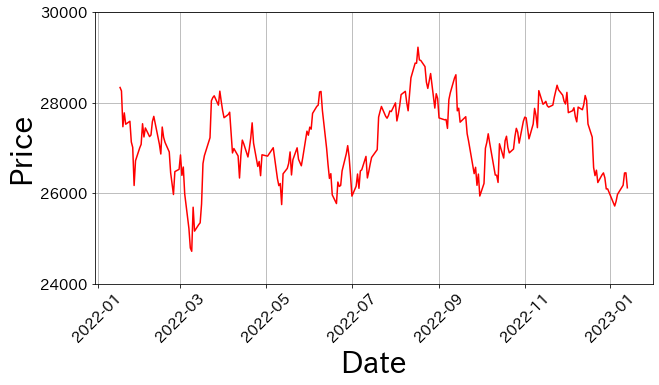

In [286]:
# 10
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5))
# 折線グラフ:pltメソッドの(plot関数)、グラフ色変更:引数(color)
plt.plot(x, y, color="red")

plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.grid()

plt.show()

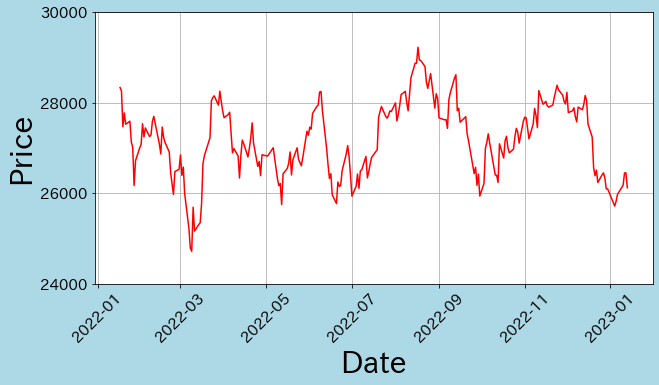

In [287]:
# 11
x = data.index
y = data['Adj Close']

# グラフ全体の変更：figure関数、背景色変更：引数（facecolor）
plt.figure(figsize=(10, 5), facecolor="lightblue")
plt.plot(x, y, color="red")

plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.grid()

plt.show()

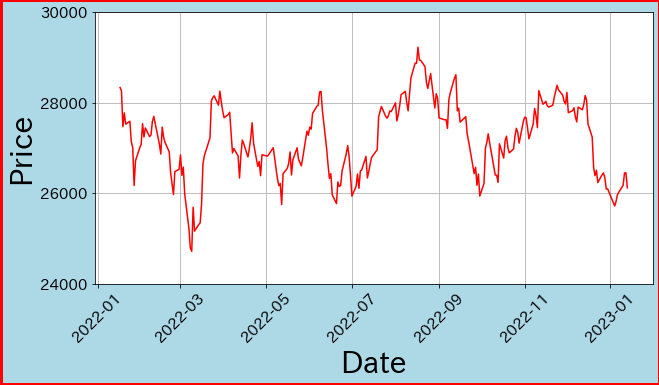

In [289]:
# 12
x = data.index
y = data['Adj Close']

# グラフ全体の変更：figure関数、枠線太さ：引数(linewidth)、枠線色：引数(edgecolor)
plt.figure(figsize=(10, 5), facecolor="lightblue", linewidth=5, edgecolor='red')
plt.plot(x, y, color="red")

plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.grid()

plt.show()

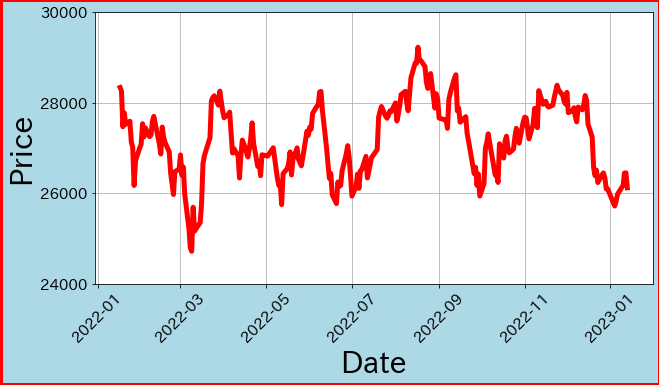

In [290]:
# 13
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5), facecolor="lightblue", linewidth=5, edgecolor='red')
# 折線グラフ:pltメソッドの(plot関数)、太さ：引数（linewidth）
plt.plot(x, y, color="red", linewidth=5)

plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.grid()

plt.show()

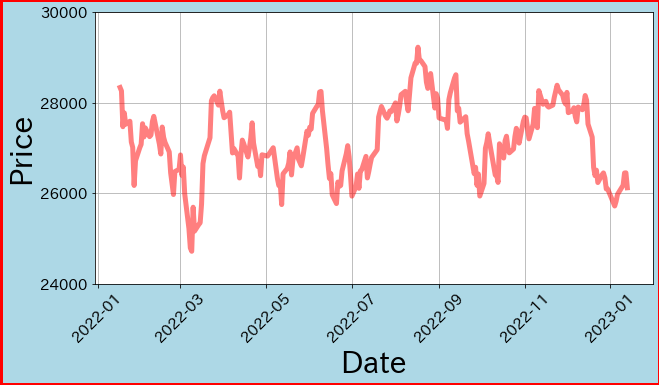

In [293]:
# 14
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5), facecolor="lightblue", linewidth=5, edgecolor='red')
# 折線グラフ:pltメソッドの(plot関数)、透明度：引数（alpha）
plt.plot(x, y, color="red", linewidth=5, alpha=0.5)

plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.grid()

plt.show()

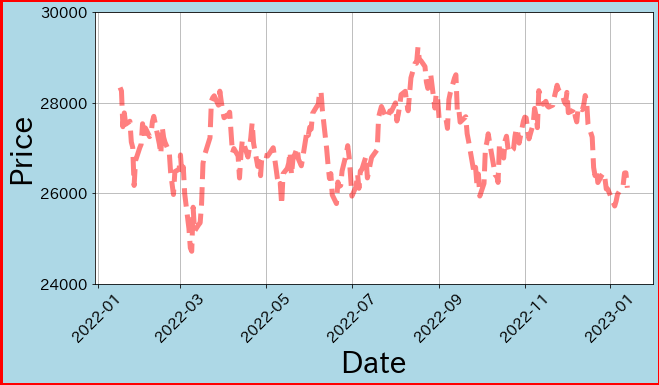

In [295]:
# 15
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5), facecolor="lightblue", linewidth=5, edgecolor='red')
# 折線グラフ:pltメソッドの(plot関数)、線スタイル:引数（linestyle）
plt.plot(x, y, color="red", linewidth=5, alpha=0.5, linestyle="--")

plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.grid()

plt.show()

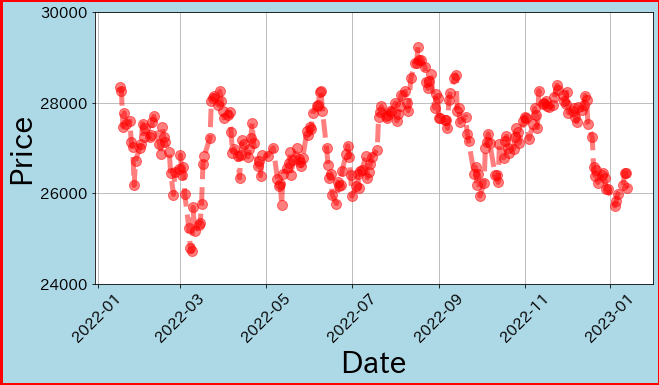

In [298]:
# 16
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5), facecolor="lightblue", linewidth=5, edgecolor='red')
# 折線グラフ:pltメソッドの(plot関数)、マーカー：引数(marker)、マーカーサイズ（引数（markersize））
plt.plot(x, y, color="red", linewidth=5, alpha=0.5, linestyle="--", marker="o", markersize=10)

plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.grid()

plt.show()

In [313]:
# 17
# pip install japanize-matplotlib(グラフに日本語を表示させる)
import japanize_matplotlib

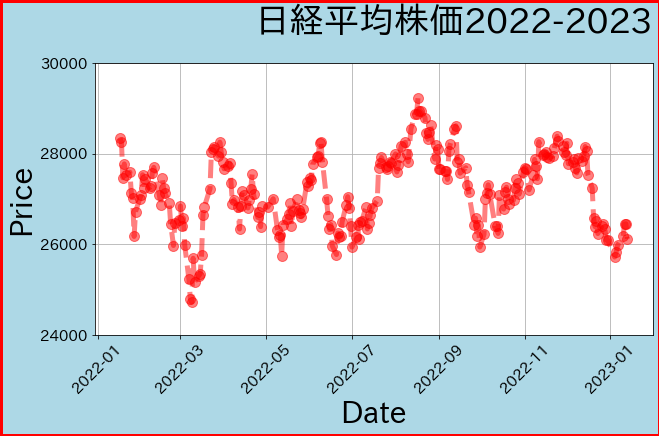

In [304]:
# 17
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5), facecolor="lightblue", linewidth=5, edgecolor='red')
plt.plot(x, y, color="red", linewidth=5, alpha=0.5, linestyle="--", marker="o", markersize=10)

plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.grid()
#タイトル表示：関数（title）、タイトル名:引数（label）、フォントサイズ：引数（fontsize）、グラフとの余白:引数（pad）、位置：引数（loc）
plt.title("日経平均株価2022-2023", fontsize=35, pad=30, loc="right")

plt.show()

In [319]:
# 1ポイントアドバイス：期間で一番下落している終値、インデックス番号、日付を取得しよう
print(data['Adj Close'].min())
print(data['Adj Close'].argmin())
print(data.index[35])

24717.529296875
35
2022-03-09 00:00:00+09:00


In [322]:
# 18
import matplotlib.dates as mdates

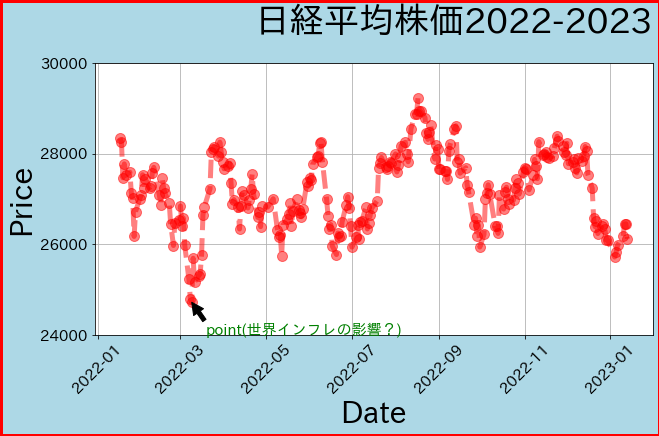

In [330]:
# 18
x = data.index
y = data['Adj Close']

plt.figure(figsize=(10, 5), facecolor="lightblue", linewidth=5, edgecolor='red')
plt.plot(x, y, color="red", linewidth=5, alpha=0.5, linestyle="--", marker="o", markersize=10)

plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.grid()
#タイトル表示：関数（title）、タイトル名:引数（label）、フォントサイズ：引数（fontsize）、グラフとの余白:引数（pad）、位置：引数（loc）
plt.title("日経平均株価2022-2023", fontsize=35, pad=30, loc="right")

plt.annotate('point(世界インフレの影響？)', 
             xy=(mdates.date2num(x[35]), y[35]), 
             xytext=(mdates.date2num(x[35])+10, 24000), 
             fontsize=15, 
             color='green', 
             arrowprops=dict(color='black'))

plt.show()

参考：<コメント付き全体コード>

[*********************100%***********************]  1 of 1 completed


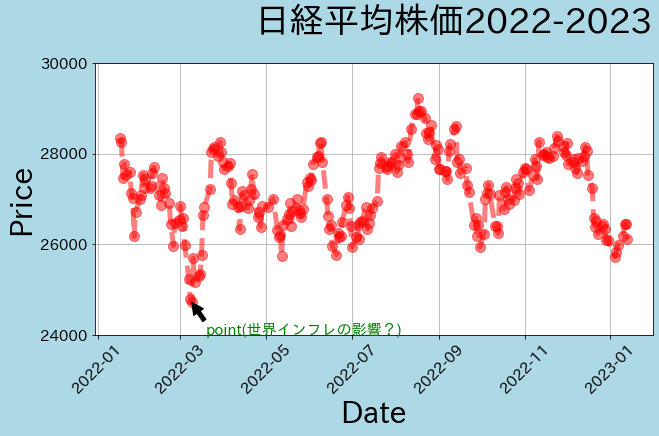

In [332]:
# 引数をリテラルで書くことはなるべく避けるほうがコードにとって良いので変数に格納する
# 証券コードを指定する（日経平均：'^N225'）
stock_code = '^N225'
start = "2022-01-15"
end = "2023-01-14"

data = yf.download(tickers=stock_code, start=start, end=end)

x = data.index
y = data['Adj Close']

# グラフ全体の変更：figure関数、サイズ変更：引数（figsize（横インチ、　縦インチ））、背景色変更：引数（facecolor）,枠線太さ：引数(linewidth),枠線色：引数(edgecolor)
plt.figure(figsize=(10, 5), facecolor="lightblue")
# 折線グラフ:pltメソッドの(plot関数)、グラフ色変更:引数(color)、太さ：引数（linewidth）、透明度：引数（alpha）、線スタイル:引数（linestyle）、マーカー：引数(marker)、マーカーサイズ（引数（markersize））
plt.plot(x, y, color="red", linewidth=5, alpha=0.5, linestyle="--", marker="o", markersize=10)

# 各軸目盛り：関数(xticks、yticks)、軸目盛り：引数（ticks）、フォントサイズ：引数（fontsize)、軸の目盛り角度：引数（rotation）
plt.xticks(fontsize=15, rotation=45)
plt.yticks(ticks=[24000, 26000, 28000, 30000], fontsize=15)
# x軸ラベル表示:関数(xlabel)、ラベル名:引数(xlabel)、フォントサイズ:引数(fontsize)
plt.xlabel('Date', fontsize=30)
# y軸ラベル表示:関数(ylabel)、ラベル名:引数(ylabel)、フォントサイズ:引数(fontsize)
plt.ylabel('Price', fontsize=30)
# グリッド線の表示：grid関数
plt.grid()
#タイトル表示：関数（title）、タイトル名:引数（label）、フォントサイズ：引数（fontsize）、グラフとの余白:引数（pad）、位置：引数（loc）
plt.title("日経平均株価2022-2023", fontsize=35, pad=30, loc="right")

plt.annotate('point(世界インフレの影響？)', 
             xy=(mdates.date2num(x[35]), y[35]), 
             xytext=(mdates.date2num(x[35])+10, 24000), 
             fontsize=15, 
             color='green', 
             arrowprops=dict(color='black'))

plt.show()

<font color="purple" size=3>　■ 問4　移動平均の計算</font>

In [340]:
# 1
# 引数をリテラルで書くことはなるべく避けるほうがコードにとって良いので変数に格納する
# 証券コードを指定する（日経平均：'^N225'）
stock_code = '^N225'
start = "2022-01-15"
end = "2023-01-14"

df = yf.download(tickers=stock_code, start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-17 00:00:00+09:00,28332.720703,28449.990234,28274.179688,28333.519531,28333.519531,54500000
2022-01-18 00:00:00+09:00,28451.339844,28690.339844,28129.660156,28257.250000,28257.250000,71300000
2022-01-19 00:00:00+09:00,27928.890625,27958.169922,27314.410156,27467.230469,27467.230469,84300000
2022-01-20 00:00:00+09:00,27401.429688,27882.529297,27217.589844,27772.929688,27772.929688,74000000
2022-01-21 00:00:00+09:00,27404.359375,27586.419922,27129.609375,27522.259766,27522.259766,72700000


In [341]:
span05 = 5
span25 = 25

# 5日移動平均
df['sma05'] = df['Adj Close'].rolling(window=span05).mean()
# 25日移動平均
df['sma25'] = df['Adj Close'].rolling(window=span25).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,sma05,sma25
Date,,,,,,,,
2022-01-17 00:00:00+09:00,28332.720703,28449.990234,28274.179688,28333.519531,28333.519531,54500000,NaN,NaN
2022-01-18 00:00:00+09:00,28451.339844,28690.339844,28129.660156,28257.250000,28257.250000,71300000,NaN,NaN
2022-01-19 00:00:00+09:00,27928.890625,27958.169922,27314.410156,27467.230469,27467.230469,84300000,NaN,NaN
2022-01-20 00:00:00+09:00,27401.429688,27882.529297,27217.589844,27772.929688,27772.929688,74000000,NaN,NaN
2022-01-21 00:00:00+09:00,27404.359375,27586.419922,27129.609375,27522.259766,27522.259766,72700000,27870.637891,NaN


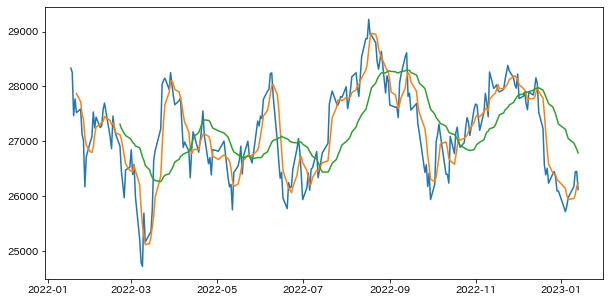

In [345]:
# 1
x = df.index
y = df["Adj Close"]

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.plot(x, df['sma05'])
plt.plot(x, df['sma25'])
plt.show()

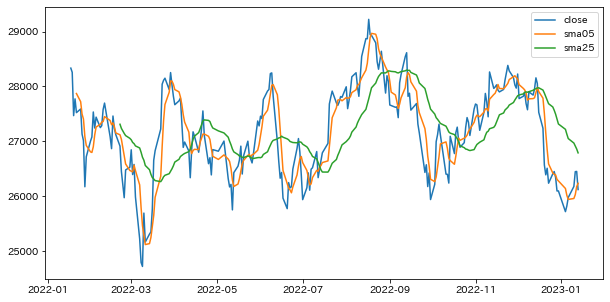

In [359]:
# 2
x = df.index
y = df["Adj Close"]

plt.figure(figsize=(10, 5))
#
plt.plot(x, y, label='close')
plt.plot(x, df['sma05'], label='sma05')
plt.plot(x, df['sma25'], label='sma25')
#
plt.legend()
plt.show()

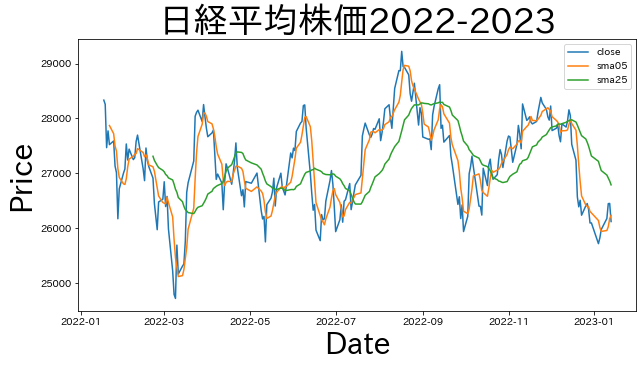

In [360]:
# 3
x = df.index
y = df["Adj Close"]

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='close')
plt.plot(x, df['sma05'], label='sma05')
plt.plot(x, df['sma25'], label='sma25')
#タイトル表示：関数（title）、タイトル名:引数（label）、フォントサイズ：引数（fontsize）、グラフとの余白:引数（pad）、位置：引数（loc）
plt.title("日経平均株価2022-2023", fontsize=35)
# x軸ラベル表示:関数(xlabel)、ラベル名:引数(xlabel)、フォントサイズ:引数(fontsize)
plt.xlabel('Date', fontsize=30)
# y軸ラベル表示:関数(ylabel)、ラベル名:引数(ylabel)、フォントサイズ:引数(fontsize)
plt.ylabel('Price', fontsize=30)
plt.legend()
plt.show()

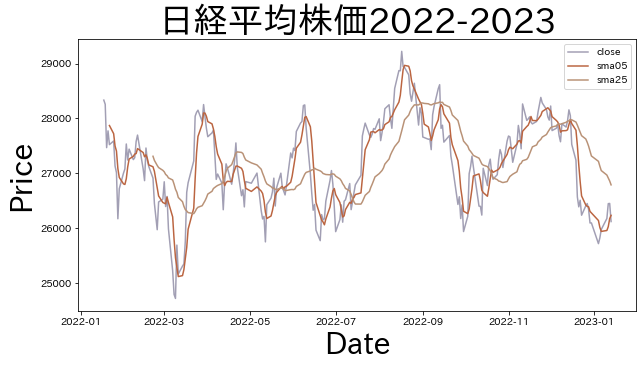

In [362]:
# 4
x = df.index
y = df["Adj Close"]

plt.figure(figsize=(10, 5))
#
plt.plot(x, y, label='close', color='#A29FB4')
plt.plot(x, df['sma05'], label='sma05', color='#BB6541')
plt.plot(x, df['sma25'], label='sma25', color='#B99277')
plt.title("日経平均株価2022-2023", fontsize=35)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.legend()
plt.show()

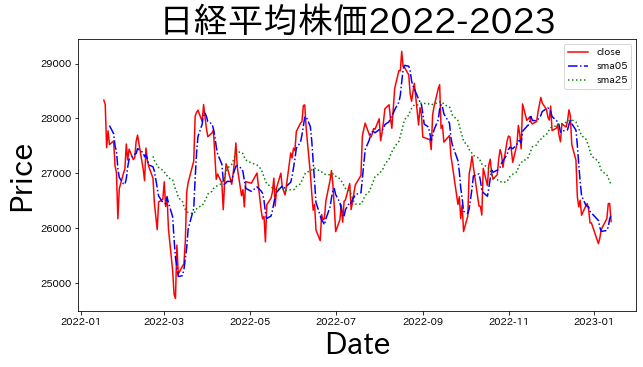

In [363]:
# 5
plt.figure(figsize=(10, 5))
#
plt.plot(x, y, label='close', color='r')
plt.plot(x, df['sma05'], label='sma05', color='b', linestyle='-.')
plt.plot(x, df['sma25'], label='sma25', color='g', linestyle=':')
plt.title("日経平均株価2022-2023", fontsize=35)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
plt.legend()
plt.show()

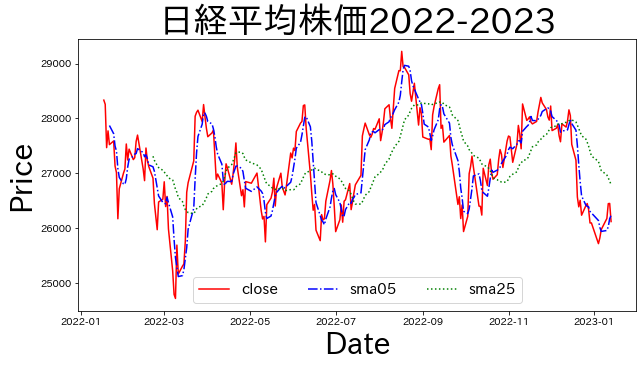

In [367]:
# 6
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='close', color='r')
plt.plot(x, df['sma05'], label='sma05', color='b', linestyle='-.')
plt.plot(x, df['sma25'], label='sma25', color='g', linestyle=':')
plt.title("日経平均株価2022-2023", fontsize=35)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price', fontsize=30)
#
plt.legend(fontsize=15, ncol=3, loc='lower center')
plt.show()

In [368]:
# 7
# 引数をリテラルで書くことはなるべく避けるほうがコードにとって良いので変数に格納する
# 証券コードを指定する（日経平均：'^N225'）
stock_code = '^N225'
start = "2022-01-15"
end = "2023-01-14"

df = yf.download(tickers=stock_code, start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-17 00:00:00+09:00,28332.720703,28449.990234,28274.179688,28333.519531,28333.519531,54500000
2022-01-18 00:00:00+09:00,28451.339844,28690.339844,28129.660156,28257.250000,28257.250000,71300000
2022-01-19 00:00:00+09:00,27928.890625,27958.169922,27314.410156,27467.230469,27467.230469,84300000
2022-01-20 00:00:00+09:00,27401.429688,27882.529297,27217.589844,27772.929688,27772.929688,74000000
2022-01-21 00:00:00+09:00,27404.359375,27586.419922,27129.609375,27522.259766,27522.259766,72700000


In [370]:
span20 = 20

df['high20'] = y.rolling(window=span20).max()
df['low20'] = y.rolling(window=span20).min()

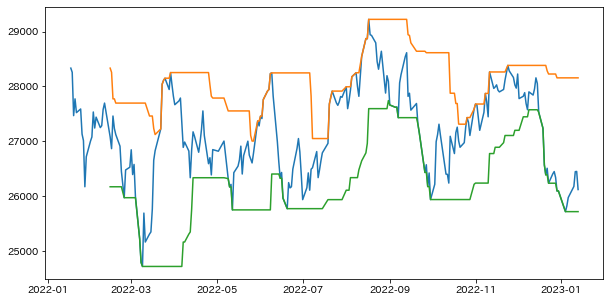

In [371]:
# 7
x = df.index
y = df["Adj Close"]

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.plot(x, df['high20'])
plt.plot(x, df['low20'])
plt.show()